# Netflix Movie Data Analysis Project 


    Netflix is known  for its work in data science, ai and ML, particulary for building strong  recomondation
    mpdels and algorithms that understand customer behaviour and patterns.
    Suppose you are working in a data-driven job role, and you have a dataset of more than 9,000 moviews.
    You need to solve the follwing questions to help company make informed bussiness accordingly.

    1). What is the most frequesntly genre of movies  reeased on Netflix?
    2). Which has highest votes in vote avg column?
    3). What movie got the highest popularity? what its genre?
    4). what movie got the lowest popularity? what's it genre?
    5). Which year has the most filmed movies?


In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('netflixmoviedb.csv', lineterminator= '\n')

In [5]:
dataset.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [7]:
dataset['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [8]:
dataset.duplicated().sum()

np.int64(0)

In [9]:
dataset.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000



    Exploration Summary 
    -------------------
    * We have a dataframe consisting of 9827 rows and 9 columns.
    * Our dataset looks a bit tidy with no  Nans nor duplicates values.
    * Release_Date columnn needs to be casted into date time and to extract only the year of the values.
    * Overview, Original_language and Poster-Url wouldn't be so useful during analytcs, so we'll drop time.
    * There is noticab;e outliers in popularity anaysis.
    * Vote_average better be categorised for proper analysis.
    * Genre column has come seprated values and white spaces to be handled and casted itno category. Exploration summery.


In [11]:
dataset.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [12]:
dataset["Release_Date"] = pd.to_datetime(dataset["Release_Date"])
print(dataset["Release_Date"].dtypes)

datetime64[ns]


In [13]:
dataset["Release_Date"] = dataset["Release_Date"].dt.year

dataset["Release_Date"].dtypes

dtype('int32')

In [14]:
dataset.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Droping the Columns because no need this projects 

In [15]:
cols = ["Overview", "Original_Language", "Poster_Url"]
dataset.drop(cols, axis=1, inplace = True) # permanent delete columns because they were no need 
dataset.columns 

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [16]:
dataset.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


# Categorizing Vote_Average Columns 
We would cut the Vote_Average values and make 4 categories popular average below_avg not_popular to describe it more 
using categorize_col() function provided above.

In [17]:
# User Defined Functions 
def categorize_col(dataset, col, labels):
    edges = [dataset[col].describe()["min"],
             dataset[col].describe()["25%"],
             dataset[col].describe()["50%"],
             dataset[col].describe()["75%"],
             dataset[col].describe()["max"]]
    dataset[col] = pd.cut(dataset[col],edges, labels = labels, duplicates="drop")  # cut() categorization me madad karta hai
    return dataset        

In [18]:
labels = ["not_popular", "below_avg", "average", "popular"]

# call functions 
categorize_col(dataset,col="Vote_Average", labels=labels)
dataset['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [19]:
dataset.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [20]:
dataset['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [21]:
dataset.dropna(inplace =True) # inplace function will be use permanentaly remove 
dataset.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

<!-- We would split genres into a list and then explode our dataframe to have only one genre per row for each movie  -->

# We would split genres into a list and then explode our dataframe to have only one genre per row for each movie


In [22]:
dataset.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [24]:
dataset["Genre"] = dataset["Genre"].str.split(',')
dataset = dataset.explode("Genre").reset_index(drop=True)

In [25]:
dataset.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [26]:
# Casting Column into Categories 

dataset["Genre"] = dataset["Genre"].astype('category') # categories always astype() functions 
dataset["Genre"].dtypes

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 750.3+ KB


In [29]:
dataset.nunique() # uniques check data for use nunique() function will be use 

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             38
dtype: int64

# Data Visualization

What is the most frequesntly genre of movies  reeased on Netflix?

In [31]:
sns.set_style("whitegrid")

In [32]:
dataset["Genre"].describe()

count         25552
unique           38
top        Thriller
freq           1960
Name: Genre, dtype: object

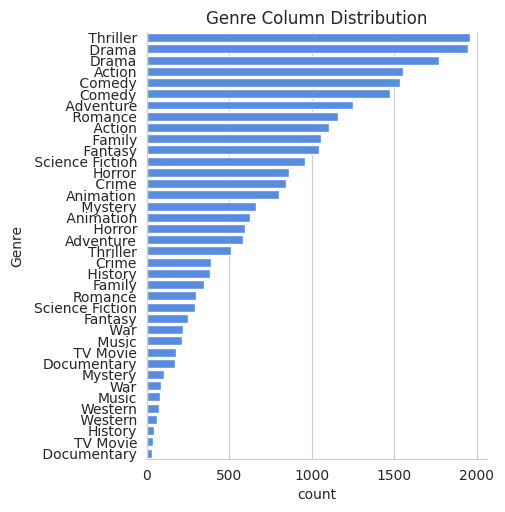

In [40]:
sns.catplot(
    y="Genre",
    data=dataset,
    kind="count",
    order=dataset["Genre"].value_counts().index,
    color='#4287f5'
)

plt.title("Genre Column Distribution")
plt.show()


# Which has highest votes in vote avg column?

In [41]:
dataset.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


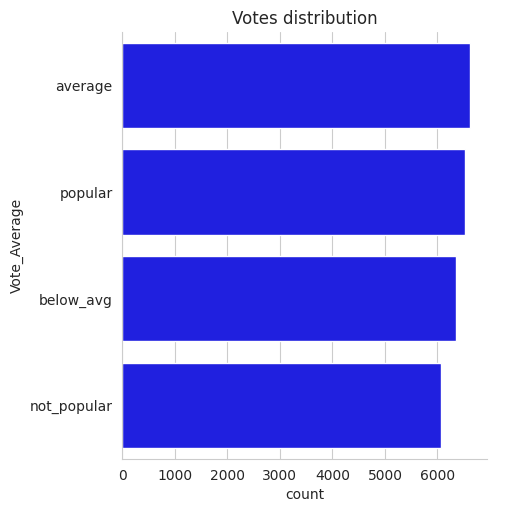

In [47]:
sns.catplot( y="Vote_Average", data=dataset, kind='count',
             order=dataset['Vote_Average'].value_counts().index,
             color='blue')
plt.title("Votes distribution")
plt.show()

# What movie got the highest popularity? what its genre?

In [48]:
dataset.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [51]:
dataset[dataset["Popularity"] == dataset["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# what movie got the lowest popularity? what's it genre?

In [53]:
dataset[dataset["Popularity"] == dataset["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


 # Which year has the most filmed movies?

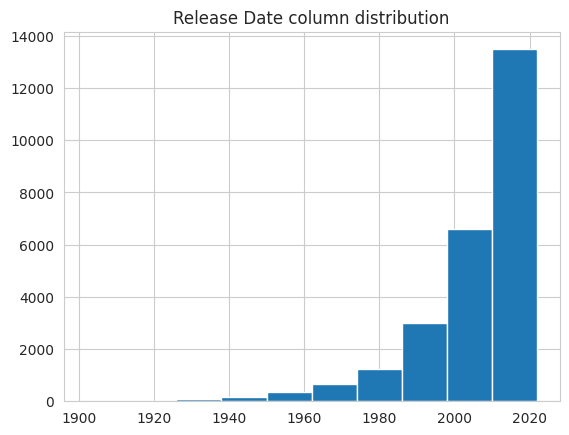

In [54]:
dataset["Release_Date"].hist()
plt.title("Release Date column distribution")
plt.show()

Conclusion
-----------
Q) 1.  What is the most frequesntly genre of movies  reeased on Netflix?
Ans-   Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 
       19 other genres.

Q) 2. Which has highest votes in vote avg column?
Ans-  we have 25.2% of our dataset with popular vote (6520 rows). Drama again gets the highest
      popularity among fans by being having more than 18.5% movies popularity 

Q) 3. What movie got the highest popularity? what its genre?
Ans-  Spider-Man No Way Home has the hisghest popularit rate u=in our dataset and its has genres of Action
      Adventure and Science Fiction.

Q) 4. what movie got the lowest popularity? what's it genre?
Ans-  The United states, thread has the highest lowest rate in our datset and it has genres of music, drama, war, Sco-fi, and 

Q) 5. Which year has the most filmed movies?
Ans-  Years 2020 has the highest filming rate in our dataset.